<h1><center>UAF PSSe DEMO</center></h1>
<h4><center>______________________________________________________________</center></h4>

<h4><center>All the paths and imports needed for the script (will vary between systems and versions)</center></h4>

In [1]:
import os,sys

# Path stuff
sys.path.append(r"C:\Program Files\PTI\PSSE35\35.3\PSSPY37")
sys.path.append(r"C:\Program Files\PTI\PSSE35\35.3\PSSBIN")
sys.path.append(r"C:\Program Files\PTI\PSSE35\35.3\PSSLIB")
sys.path.append(r"C:\Program Files\PTI\PSSE35\35.3\EXAMPLE")
os.environ['PATH'] = (r"C:\Program Files\PTI\PSSE35\35.3\PSSPY37;" 
  + r"C:\Program Files\PTI\PSSE35\35.3\PSSBIN;" 
  + r"C:\Program Files\PTI\PSSE35\35.3\EXAMPLE;" + os.environ['PATH'])
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import psse35
psse35.set_minor(3)
import psspy
psspy.psseinit(50)

import wecgrid as wg # my package *****

    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 Input error detected at !
 -m ipykernel_launcher -f C:\Users\barajale\AppData\Roaming\jupyter\runtime\kernel-9e7b242b-92fd-493b-98ac-09c9b514cfa7.json
                          !

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2022
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.


           SIEMENS POWER T

<br>
<br>
<h4><center> The cell below reads in a raw file into PSSe memory, and then completes a Newton-Raphson power flow calculation to converge to a solution</center></h4>

In [2]:
case14 = r"C:\Users\barajale\Desktop\research_code\case14.raw"
psspy.read(1,case14)
psspy.fnsl() # <- chosen solver 


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 14 records for Bus data
 Starting processing of Load data records
 Finished processing of 11 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 1 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 5 records for Generator data
 Starting processing of Branch data records
 Finished processing of 17 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 12 records for 3 Transformer data
 Starting processing of Area data records
 Finished processing of 0 records for Area data
 Starting processing of Tw

0

<br>
<br>
<h4><center>Using a helper function we can power flow parameters of our grid</center></h4>

In [3]:
# lets see what the values are on the solved state 
lst = ['BASE', 'PU', 'ANGLED', 'P', 'Q'] # lets check these out parameters
bus_df = wg.get_values(lst)
bus_df

,Bus,BASE,PU,ANGLED,Type,P,Q
0,BUS 1,0.0,1.060000,0.000000,3,2.323933e+02,-16.549339
1,BUS 2,0.0,1.045000,-4.982592,2,1.829999e+01,30.857103
2,BUS 3,0.0,1.010000,-12.725105,2,-9.420000e+01,6.075377
3,BUS 4,0.0,1.017671,-10.312905,1,-4.780000e+01,3.899999
4,BUS 5,0.0,1.019514,-8.773857,1,-7.599995e+00,-1.600000
5,BUS 6,0.0,1.070000,-14.220952,2,-1.120000e+01,5.231007
6,BUS 7,0.0,1.061520,-13.359633,1,-5.776712e-11,0.000001
7,BUS 8,0.0,1.090000,-13.359632,2,5.776629e-11,17.623468
8,BUS 9,0.0,1.055932,-14.938527,1,-2.950000e+01,4.584844
9,BUS 10,0.0,1.050985,-15.097295,1,-9.000000e+00,-5.800000


<br>
<br>
<h4><center>We can take a peep behind the scene of some of the helper functions</center></h4>

In [23]:
#wg.get_values??
#wg.get_p_or_q??
#wg.busNum??
# wg.bus_voltages_to_list??
# wg.format_voltage_bus??

psspy.fnsl??

<br>
<br>
<h4><center>Lets check out our case visually using Matpower.app and confirm our output</center></h4>

In [5]:
from IPython.display import IFrame
IFrame(src="https://matpower.app", width='100%', height='600px')

In [6]:
bus_df

,Bus,BASE,PU,ANGLED,Type,P,Q
0,BUS 1,0.0,1.060000,0.000000,3,2.323933e+02,-16.549339
1,BUS 2,0.0,1.045000,-4.982592,2,1.829999e+01,30.857103
2,BUS 3,0.0,1.010000,-12.725105,2,-9.420000e+01,6.075377
3,BUS 4,0.0,1.017671,-10.312905,1,-4.780000e+01,3.899999
4,BUS 5,0.0,1.019514,-8.773857,1,-7.599995e+00,-1.600000
5,BUS 6,0.0,1.070000,-14.220952,2,-1.120000e+01,5.231007
6,BUS 7,0.0,1.061520,-13.359633,1,-5.776712e-11,0.000001
7,BUS 8,0.0,1.090000,-13.359632,2,5.776629e-11,17.623468
8,BUS 9,0.0,1.055932,-14.938527,1,-2.950000e+01,4.584844
9,BUS 10,0.0,1.050985,-15.097295,1,-9.000000e+00,-5.800000


<br>
<br>
<h4><center>Lets take a look at our Wec output from WEC-SIM</center></h4>

In [7]:
# read in wec gen values (CSV format)
wec_gen_values = pd.read_csv("./WECgen_data.csv")
wec_gen_values

,time,ibus,machid,pg,qg,qt,qb,vs,ireg,nreg,...,xt,gtap,stat,rmpct,pt,pb,o1,f1,wmod,wpf
0,0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.5
1,300,1.0,1.0,0.019870,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.019870,0.0,NaN,NaN,2.0,0.5
2,600,1.0,1.0,0.016054,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.016054,0.0,NaN,NaN,2.0,0.5
3,900,1.0,1.0,0.020990,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.020990,0.0,NaN,NaN,2.0,0.5
4,1200,1.0,1.0,0.016094,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.016094,0.0,NaN,NaN,2.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,20400,1.0,1.0,0.021365,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.021365,0.0,NaN,NaN,2.0,0.5
69,20700,1.0,1.0,0.017197,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.017197,0.0,NaN,NaN,2.0,0.5
70,21000,1.0,1.0,0.022581,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.022581,0.0,NaN,NaN,2.0,0.5
71,21300,1.0,1.0,0.020330,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.020330,0.0,NaN,NaN,2.0,0.5


In [8]:
wec_gen_values.iloc[1]

time      300.00000
ibus        1.00000
machid      1.00000
pg          0.01987
qg          0.00000
qt          0.05000
qb         -0.05000
vs          1.00000
ireg        0.00000
nreg        0.00000
mbase           NaN
zr              NaN
zx              NaN
rt              NaN
xt              NaN
gtap            NaN
stat            NaN
rmpct           NaN
pt          0.01987
pb          0.00000
o1              NaN
f1              NaN
wmod        2.00000
wpf         0.50000
Name: 1, dtype: float64

In [9]:
wec_gen_values.time

0         0
1       300
2       600
3       900
4      1200
      ...  
68    20400
69    20700
70    21000
71    21300
72    21600
Name: time, Length: 73, dtype: int64

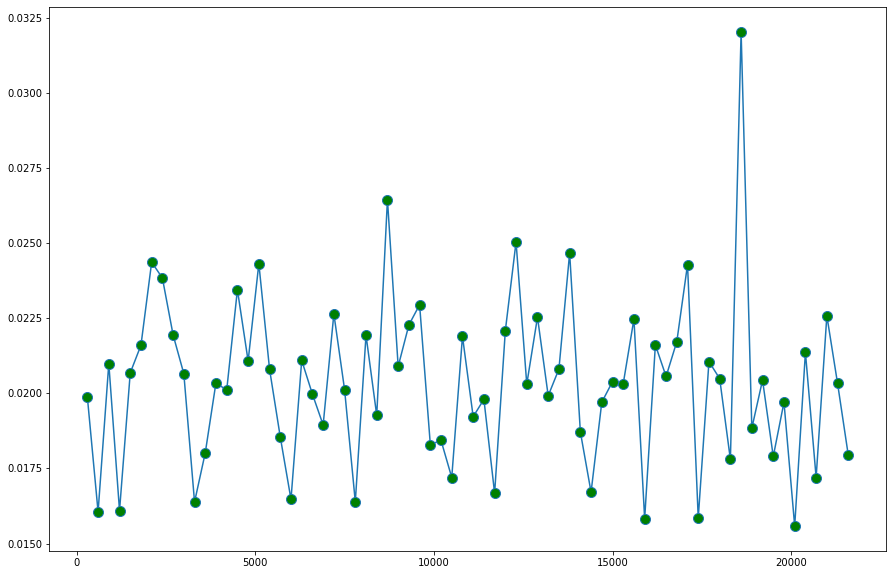

In [10]:
plt.rcParams["figure.figsize"] = (15,10)
#lines = wec_gen_values.plot.line(x='time', y=['pg'])
plt.plot(wec_gen_values.time, wec_gen_values.pg, marker="o", markersize=10, markerfacecolor="green")

<br>
<br>
<h4><center>Now that we have a solved grid in memory and WEC data, lets change the set point of one of our buses using our WEC data and solve the DC power flow</center></h4>

![wec-csv.png](./wec-solve.png)

In [21]:
history = [] # Keep track of our dataframe snapshots at each time step

In [22]:
# choose the next time step set point and run the solver 
# solve DC power flow
print("Time: {}".format(wec_gen_values.iloc[1].time))
print("P setpoint: {}".format(wec_gen_values.iloc[1].pg))
ierr = psspy.machine_chng_3(8, "1", [], [ wec_gen_values.iloc[1].pg]) # time 300
psspy.fnsl()
history.append(wg.get_values(lst))

Time: 300.0
P setpoint: 0.0198698935614292

 Power flow data changed for machine "1" at bus 8 [BUS 8             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.179418E-01    0.198699E-01  PG

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0000(      8     )    0.0000(      5     )
                                                             0.00000(      4     )   0.00001(      8     )
   1         0.0000(      4     )    0.0000(      9     )
                                                             0.00000(      8     )   0.00000(      8     )
   2         0.0000(      4     )    0.0000(      5     )


 Reached tolerance in 2 iterations

 Largest mismatch:      0.00 MW      0.00 Mvar      0.00 MVA at bus 9 [BUS 9             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BASKV      PGEN     PMAX    PMIN      QGEN     QMAX    QMIN
      1     BUS 1 

In [20]:
history[0]

,Bus,BASE,PU,ANGLED,Type,P,Q
0,BUS 1,0.0,1.060000,0.000000,3,232.371178,-1.654675e+01
1,BUS 2,0.0,1.045000,-4.982107,2,18.299992,3.084993e+01
2,BUS 3,0.0,1.010000,-12.724270,2,-94.199993,6.073180e+00
3,BUS 4,0.0,1.017675,-10.311835,1,-47.799999,3.900000e+00
4,BUS 5,0.0,1.019517,-8.772964,1,-7.599998,-1.600000e+00
5,BUS 6,0.0,1.070000,-14.219532,2,-11.199998,5.229505e+00
6,BUS 7,0.0,1.061523,-13.357180,1,-0.000001,-9.536743e-07
7,BUS 8,0.0,1.090000,-13.355449,2,0.019870,1.762164e+01
8,BUS 9,0.0,1.055936,-14.936478,1,-29.499997,4.584994e+00
9,BUS 10,0.0,1.050988,-15.095357,1,-9.000000,-5.800000e+00


In [14]:
# choose the next time step set point and run the solver 
print("Time: {}".format(wec_gen_values.iloc[2].time))
print("P setpoint: {}".format(wec_gen_values.iloc[2].pg))
ierr = psspy.machine_chng_3(8, "1", [], [ wec_gen_values.iloc[2].pg]) # time 600
psspy.fnsl()
history.append(wg.get_values(lst))

Time: 600.0
P setpoint: 0.0160540053841577

 Power flow data changed for machine "1" at bus 8 [BUS 8             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.198699E-01    0.160540E-01  PG

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0000(      8     )    0.0000(      5     )
                                                             0.00000(      4     )   0.00001(      8     )
   1         0.0000(      7     )    0.0000(      4     )
                                                             0.00000(      8     )   0.00000(      8     )
   2         0.0000(      5     )    0.0000(      5     )


 Reached tolerance in 2 iterations

 Largest mismatch:     -0.00 MW     -0.00 Mvar      0.00 MVA at bus 9 [BUS 9             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BASKV      PGEN     PMAX    PMIN      QGEN     QMAX    QMIN
      1     BUS 1 

In [15]:
history[1]

,Bus,BASE,PU,ANGLED,Type,P,Q
0,BUS 1,0.0,1.060000,0.000000,3,2.323754e+02,-1.654725e+01
1,BUS 2,0.0,1.045000,-4.982201,2,1.830000e+01,3.085131e+01
2,BUS 3,0.0,1.010000,-12.724431,2,-9.420000e+01,6.073603e+00
3,BUS 4,0.0,1.017674,-10.312041,1,-4.780000e+01,3.900000e+00
4,BUS 5,0.0,1.019516,-8.773137,1,-7.600006e+00,-1.599999e+00
5,BUS 6,0.0,1.070000,-14.219806,2,-1.120000e+01,5.229794e+00
6,BUS 7,0.0,1.061522,-13.357652,1,1.471490e-07,-4.768372e-07
7,BUS 8,0.0,1.090000,-13.356251,2,1.605401e-02,1.762199e+01
8,BUS 9,0.0,1.055935,-14.936871,1,-2.950000e+01,4.584965e+00
9,BUS 10,0.0,1.050987,-15.095729,1,-9.000000e+00,-5.800000e+00


<br>
<br>
<h4><center> We can iterate over all the WEC values</center></h4>

In [1]:
time = [] 
history_p_1 = []
history_p_3 = []

for i in range(0,10):
    # choose the next time step set point and run the solver 
    print("Time: {}".format(wec_gen_values.iloc[i].time))
    print("P setpoint: {}".format(wec_gen_values.iloc[i].pg))
    ierr = psspy.machine_chng_3(8, "1", [], [ wec_gen_values.iloc[i].pg]) # time 600
    if ierr > 0:
        print("Failed | machine_chng_3")
    ierr = psspy.fnsl()
    if ierr > 0:
        print("Failed | fnsl")
    bus_df = wg.get_values(lst)
    history_p_1.append(bus_df.P[0])
    history_p_3.append(bus_df.P[2])
    time.append(wec_gen_values.iloc[i].time)
    print("========================")

NameError: name 'wec_gen_values' is not defined

<br>
<br>
<h4><center>Change in bus 1 (swing bus) over time</center></h4>

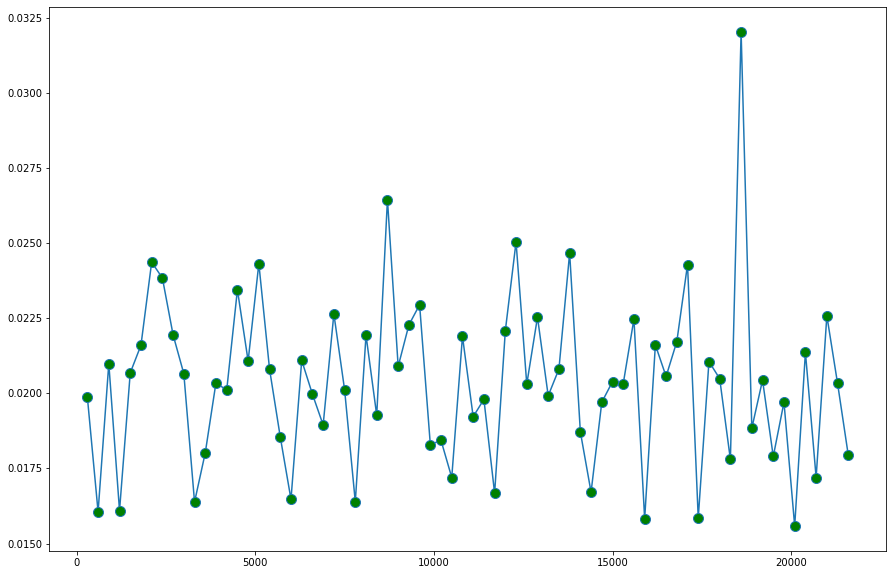

In [17]:
plt.plot(wec_gen_values.time, wec_gen_values.pg, marker="o", markersize=10, markerfacecolor="green")

<br>
<br>
<h4><center>Change in bus 8 (PV Bus) over time</center></h4>

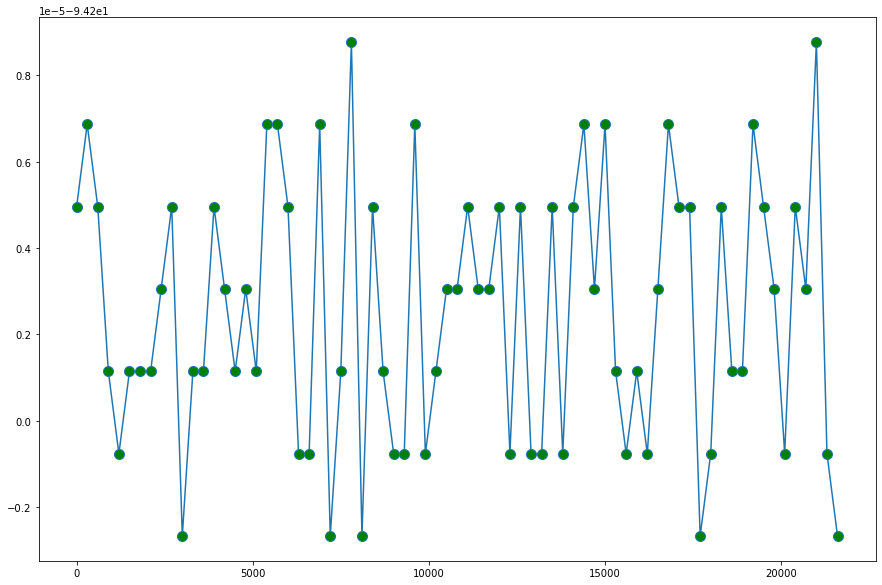

In [19]:
plt.plot(time, history_p_3, marker="o", markersize=10, markerfacecolor="green")

<br>
<br>
<h4><center> Thank you! Any questions?</center></h4>
